ML - Task4 - Regression @channel
Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:  Data
Dear students,
Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv") 
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
for i in df.columns: 
    unique = df[i].unique()
    nunique = df[i].nunique()
    print(i, ":\nUnique Values: ", unique, "\nNumber of unique values: ", nunique, "\n")

car_ID :
Unique Values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] 
Number of unique values:  205 

symboling :
Unique Values:  [ 3  1  2  0 -1 -2] 
Number of unique values:  6 

CarName :
Unique Values:  ['al

In [9]:
df.drop("car_ID", axis = 1, inplace = True)


In [10]:
df.cylindernumber.replace(["four", "six", "five", "three", "twelve", "two", "eight"], [4, 6, 5, 3, 12, 2, 8], inplace = True)
df.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [11]:
df.doornumber.replace(["two", "four"], [2, 4], inplace = True)


In [12]:
Cname = df["CarName"].str.split(" ", n = 1, expand = True)
Cname

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


In [14]:
df['Company']=Cname[0]
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
df.Company.replace(["alfa-romero","maxda", "Nissan", "porcshce", "toyouta", "vokswagen", "vw"], 
                   ["alfa-romeo", "mazda", "nissan", "porsche", "toyota", "volkswagen", "volkswagen"], 
                   inplace = True) 

AttributeError: 'DataFrame' object has no attribute 'Company'

In [14]:
df.drop("CarName", axis = 1, inplace = True)


In [15]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
for i in df.columns: 
    unique = df[i].unique()
    nunique = df[i].nunique()
    print(i, ":\nUnique Values: ", unique, "\nNumber of unique values: ", nunique, "\n")


symboling :
Unique Values:  [ 3  1  2  0 -1 -2] 
Number of unique values:  6 

fueltype :
Unique Values:  ['gas' 'diesel'] 
Number of unique values:  2 

aspiration :
Unique Values:  ['std' 'turbo'] 
Number of unique values:  2 

doornumber :
Unique Values:  [2 4] 
Number of unique values:  2 

carbody :
Unique Values:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
Number of unique values:  5 

drivewheel :
Unique Values:  ['rwd' 'fwd' '4wd'] 
Number of unique values:  3 

enginelocation :
Unique Values:  ['front' 'rear'] 
Number of unique values:  2 

wheelbase :
Unique Values:  [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 
Number of unique values:  53 

carlength :
Unique Values:  [168.8 171.2 176.6 1

In [17]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from scipy.stats import skew, kurtosis

parameters = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio",
             "horsepower", "peakrpm", "citympg", "highwaympg", "doornumber", "cylindernumber", "price"]
for i in parameters:
    print(f"Skewness of {i}: ", df[i].skew())
    print(f"Kurtosis of {i}: ", kurtosis(df[i], fisher = False), "\n")

Skewness of symboling:  0.21107227205788776
Kurtosis of symboling:  2.3109845985164834 

Skewness of wheelbase:  1.0502137758714858
Kurtosis of wheelbase:  3.9632757242326453 

Skewness of carlength:  0.1559537713215604
Kurtosis of carlength:  2.8899869988465667 

Skewness of carwidth:  0.904003498786254
Kurtosis of carwidth:  3.6566140918303747 

Skewness of carheight:  0.06312273247192804
Kurtosis of carheight:  2.5378124442806516 

Skewness of curbweight:  0.681398189052588
Kurtosis of curbweight:  2.929058120771633 

Skewness of enginesize:  1.9476550452788108
Kurtosis of enginesize:  8.148029693803652 

Skewness of boreratio:  0.02015641810424137
Kurtosis of boreratio:  2.2048490050537044 

Skewness of stroke:  -0.6897045784233837
Kurtosis of stroke:  5.092597092747467 

Skewness of compressionratio:  2.6108624576151533
Kurtosis of compressionratio:  8.077161302538663 

Skewness of horsepower:  1.4053101543373119
Kurtosis of horsepower:  5.5898619022923155 

Skewness of peakrpm:  

In [19]:
numbercols = df.select_dtypes(include = [np.number])
numbercols

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [20]:
df.select_dtypes(include=np.number).columns.tolist()


['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

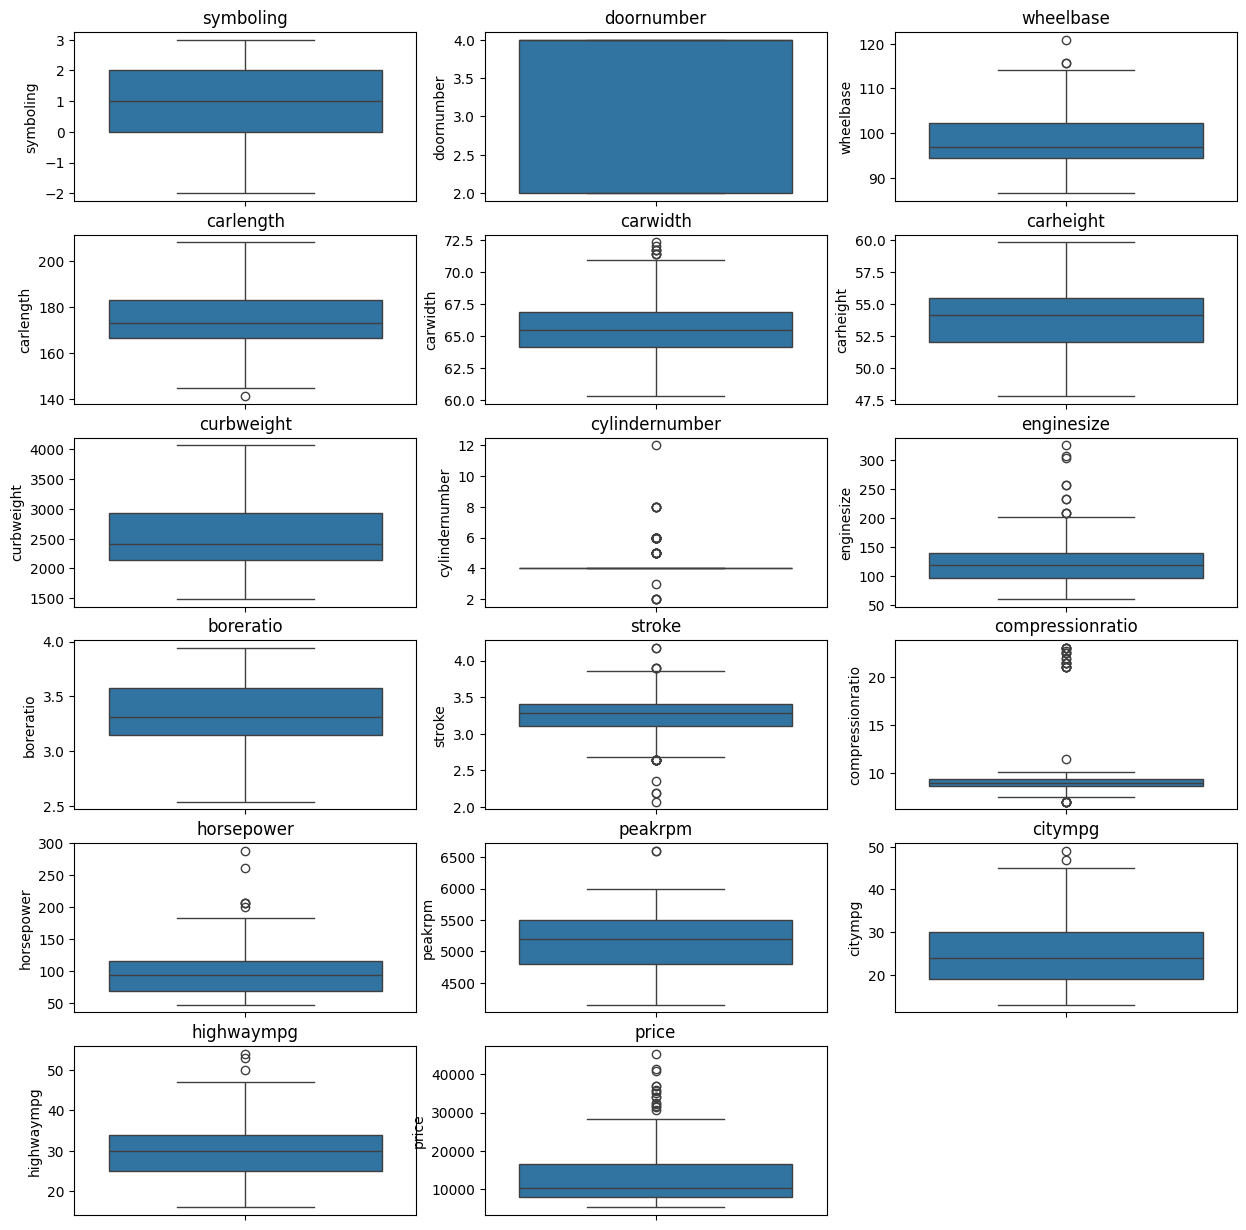

In [21]:
plt.figure(figsize=(15, 18))   # specifying the overall grid size
num_cols = df.select_dtypes(include = [np.number]) # include numeric columns

for i, col in enumerate(num_cols):
    plt.subplot(7, 3, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col) 

plt.show()

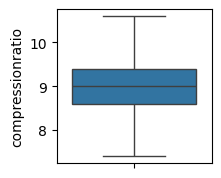

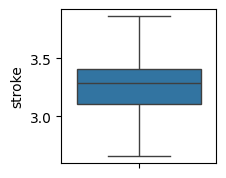

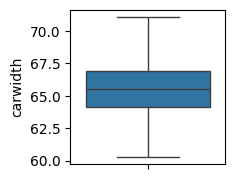

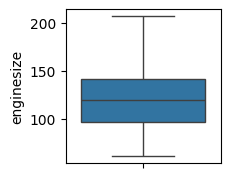

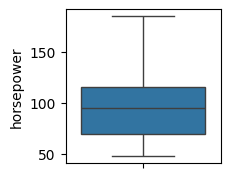

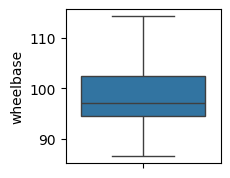

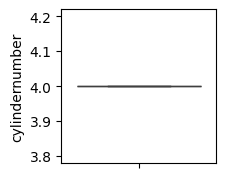

In [22]:
outliers = ["compressionratio", "stroke", "carwidth", "enginesize", "horsepower","wheelbase","cylindernumber"] 

for i in outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    df.loc[df[i] < LL, i] = LL
    df.loc[df[i] > UL, i] = UL

    plt.figure(figsize = (2, 2))
    sns.boxplot(df[i])
    plt.show()

In [26]:
df_encoded = pd.get_dummies(df, columns = ["fueltype", "aspiration", "drivewheel", "enginelocation", "carbody", "enginetype", "fuelsystem"])
df_encoded            

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,2,94.5,171.2,65.5,52.4,2823,4,152,2.68,...,True,False,False,False,False,False,False,True,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,2,4,99.4,176.6,66.4,54.3,2824,4,136,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,False,False,False,False,False,False,False,True,False,False
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,False,False,False,False,False,False,False,True,False,False
202,-1,4,109.1,188.8,68.9,55.5,3012,4,173,3.58,...,True,False,False,False,False,False,False,True,False,False
203,-1,4,109.1,188.8,68.9,55.5,3217,4,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [27]:
df_encoded.columns


Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [28]:
y = df_encoded["price"]
x = df_encoded.drop("price", axis = 1)
x, y

(     symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
 0            3           2       88.6      168.8      64.1       48.8   
 1            3           2       88.6      168.8      64.1       48.8   
 2            1           2       94.5      171.2      65.5       52.4   
 3            2           4       99.8      176.6      66.2       54.3   
 4            2           4       99.4      176.6      66.4       54.3   
 ..         ...         ...        ...        ...       ...        ...   
 200         -1           4      109.1      188.8      68.9       55.5   
 201         -1           4      109.1      188.8      68.8       55.5   
 202         -1           4      109.1      188.8      68.9       55.5   
 203         -1           4      109.1      188.8      68.9       55.5   
 204         -1           4      109.1      188.8      68.9       55.5   
 
      curbweight  cylindernumber  enginesize  boreratio  ...  enginetype_ohcv  \
 0          2548             

In [30]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(df_encoded) 
print("Scaling x \n", scaled_x)
scaled_x.shape

Scaling x 
 [[ 1.74347043 -1.13038833 -1.72300535 ...  1.08666971 -0.21428571
  -0.070014  ]
 [ 1.74347043 -1.13038833 -1.72300535 ...  1.08666971 -0.21428571
  -0.070014  ]
 [ 0.133509   -1.13038833 -0.71758985 ...  1.08666971 -0.21428571
  -0.070014  ]
 ...
 [-1.47645244  0.88465174  1.77038748 ...  1.08666971 -0.21428571
  -0.070014  ]
 [-1.47645244  0.88465174  1.77038748 ... -0.92024282 -0.21428571
  -0.070014  ]
 [-1.47645244  0.88465174  1.77038748 ...  1.08666971 -0.21428571
  -0.070014  ]]


(205, 46)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(0.95)   # indiactes 95% variance of the data
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[ 0.7655799 , -3.83542897, -0.91524495, ..., -0.79654452,
         0.7966178 , -0.33051989],
       [ 0.86597315, -3.85791934, -0.93034595, ..., -0.77585682,
         0.85675958, -0.28085784],
       [ 1.54845887, -2.47256865, -0.91272553, ...,  0.54074677,
        -1.48113095, -1.13215887],
       ...,
       [ 4.73049352, -0.7198674 ,  2.39253187, ..., -0.87042671,
        -0.54349992,  0.31905934],
       [ 3.47771717,  5.86205183, -2.61140525, ..., -0.45880608,
         0.27081494,  0.51167516],
       [ 4.2024937 ,  1.06789983,  0.53514214, ..., -1.96614801,
         0.65732971,  0.1651329 ]])

In [32]:
from sklearn.model_selection import train_test_split        #choosing the data for testing and training
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 42)


In [33]:
x_train.shape


(164, 22)

In [34]:
x_test.shape


(41, 22)

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score

models = [("Linear Regression", LinearRegression()), ("Decision Tree", DecisionTreeRegressor()), ("Random Forest", RandomForestRegressor()), 
          ("Gradient Boost", GradientBoostingRegressor(n_estimators=100, random_state = 28)), ("Support Vector Regressor", SVR())]

for name, model in models: 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    print(f"\n\n{name}: \nMean Square Error: {mse:.1f} \nR2 Score: {r2score:.4f}")    # mse should have 1 decimal point and r2 score needs 4digits after decimal



Linear Regression: 
Mean Square Error: 15429131.8 
R2 Score: 0.8046


Decision Tree: 
Mean Square Error: 9262291.9 
R2 Score: 0.8827


Random Forest: 
Mean Square Error: 7460587.7 
R2 Score: 0.9055


Gradient Boost: 
Mean Square Error: 4744247.1 
R2 Score: 0.9399


Support Vector Regressor: 
Mean Square Error: 86822613.9 
R2 Score: -0.0998


### R2 score value ranges from 0-1 and value closer to 1 indicates that the observations are closer to models predictions. And Linear regression tends to be the best fit model.